#🛠️ Preparación de los Datos

##Extracción del Archivo Tratado

In [17]:
import pandas as pd
datos=pd.read_json("datos_normalizados_nonull.json")
datos.head()

,ID,Cancelacion,Genero_cliente,Old,Pareja,Dependientes,Tiempo_contrato,Sub_Tel,Sub_MultiTel,Sub_Wifi,...,SubBackup,Sub_Proteccion,Sub_TechSup,Sub_Streaming,Sub_Mov,Cont_type,Online_Pay,Pay_meth,Pago_mensual,Pago_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Eliminación de Columnas Irrelevantes

In [18]:
#El objetivo será analizar la cancelación, por lo tanto es nuestra variable dependiente, eliminemos la columna "ID" que no nos ayudará
datos=datos.drop("ID",axis=1)
#También cambiamos la columna "Cancelacion" por bool (Yes=1 y No=0) y eliminamos valores nulos o diferentes
datos["Cancelacion"]=datos["Cancelacion"].map({"Yes":1,"No":0})
datos=datos.dropna()
datos.head(1)

,Cancelacion,Genero_cliente,Old,Pareja,Dependientes,Tiempo_contrato,Sub_Tel,Sub_MultiTel,Sub_Wifi,Sub_Security,SubBackup,Sub_Proteccion,Sub_TechSup,Sub_Streaming,Sub_Mov,Cont_type,Online_Pay,Pay_meth,Pago_mensual,Pago_total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


In [19]:
datos.describe()

,Cancelacion,Old,Tiempo_contrato,Pago_mensual,Pago_total
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,32.371149,64.761692,2279.734304
std,0.441561,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,9.000000,35.500000,398.550000
50%,0.000000,0.000000,29.000000,70.350000,1394.550000
75%,1.000000,0.000000,55.000000,89.850000,3786.600000
max,1.000000,1.000000,72.000000,118.750000,8684.800000


In [20]:
datos.describe(include="O")

,Genero_cliente,Pareja,Dependientes,Sub_Tel,Sub_MultiTel,Sub_Wifi,Sub_Security,SubBackup,Sub_Proteccion,Sub_TechSup,Sub_Streaming,Sub_Mov,Cont_type,Online_Pay,Pay_meth
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [21]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cancelacion      7043 non-null   float64
 1   Genero_cliente   7043 non-null   object 
 2   Old              7043 non-null   int64  
 3   Pareja           7043 non-null   object 
 4   Dependientes     7043 non-null   object 
 5   Tiempo_contrato  7043 non-null   int64  
 6   Sub_Tel          7043 non-null   object 
 7   Sub_MultiTel     7043 non-null   object 
 8   Sub_Wifi         7043 non-null   object 
 9   Sub_Security     7043 non-null   object 
 10  SubBackup        7043 non-null   object 
 11  Sub_Proteccion   7043 non-null   object 
 12  Sub_TechSup      7043 non-null   object 
 13  Sub_Streaming    7043 non-null   object 
 14  Sub_Mov          7043 non-null   object 
 15  Cont_type        7043 non-null   object 
 16  Online_Pay       7043 non-null   object 
 17  Pay_meth         70

##Encoding

In [27]:
#Utilizaremos el metodo get_dummies en este caso para transformar nuestras variables
X = pd.get_dummies(datos.drop('Cancelacion', axis=1), drop_first=True)
y = datos['Cancelacion']
from sklearn.model_selection import train_test_split
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

##Verificación de la Proporción de Cancelación (Churn)

Distribución sin balanceo:
Cancelacion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


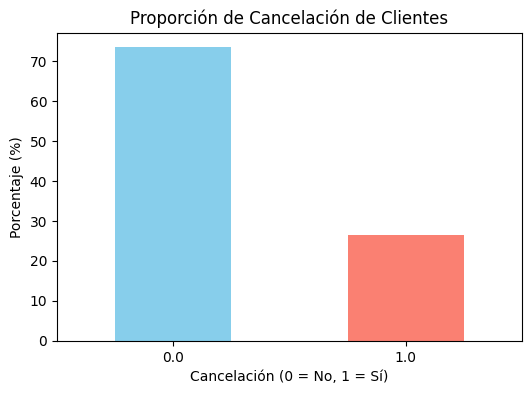

In [28]:
import matplotlib.pyplot as plt

# Calcular proporciones
proporciones = datos["Cancelacion"].value_counts(normalize=True) * 100
print("Distribución sin balanceo:")
print(y.value_counts(normalize=True) * 100)
# Gráfico de barras
plt.figure(figsize=(6,4))
proporciones.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Proporción de Cancelación de Clientes")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)
plt.show()

###No es un desbalance extremo (como 90/10), pero sí existe cierta desproporción.

*   Esto puede hacer que algunos modelos tiendan a predecir la clase mayoritaria.
*   Utilizaremos SMOTE para balancear las clases



##Balanceo de Clases

In [24]:
from imblearn.over_sampling import SMOTE
import pandas as pd
# Convertir variables categóricas a numéricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Aplicar SMOTE
smote = SMOTE(random_state=100)
X_balanceada, y_balanceada = smote.fit_resample(X_encoded, y)

# Revisar nuevas proporciones
print("Distribución después de SMOTE:")
print(y_balanceada.value_counts(normalize=True) * 100)

Distribución después de SMOTE:
Cancelacion
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


#🎯 Correlación y Selección de Variables

##Análisis de Correlación

###Identificamos relaciones entre las variables numéricas.

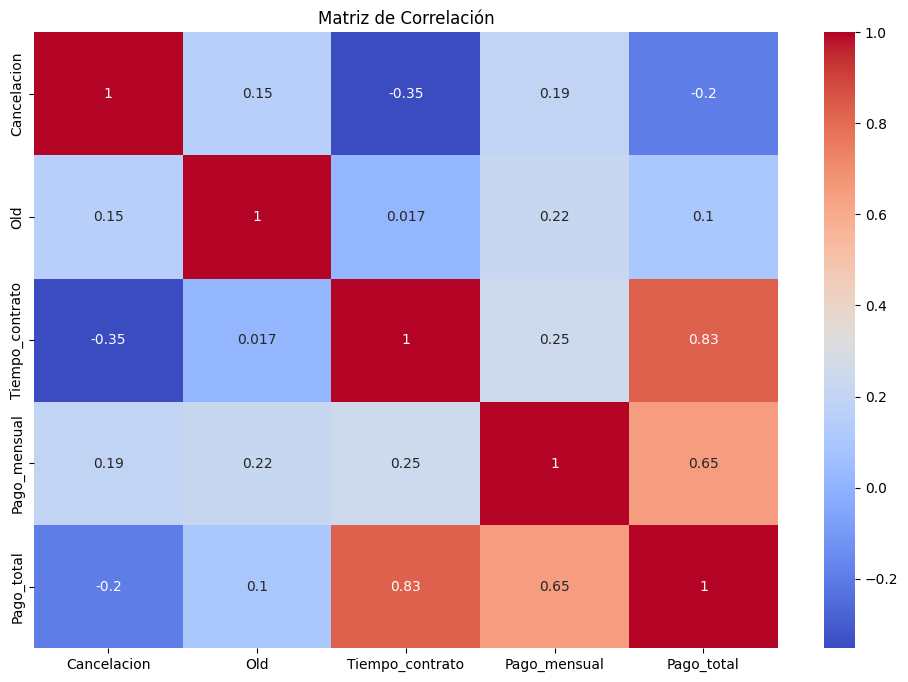

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(datos.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

##Análisis dirigido

###Veamos las vriables que se relacionan mas con la cancelacion y tambien analicemos el tipo de contrato y el tipo de servicio, variables que fueron importantes en nuestro primer analisis (TelecomX1)

/tmp/ipython-input-860307278.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelacion", y="Tiempo_contrato", data=datos, ax=axes[0,0], palette="Set2")
/tmp/ipython-input-860307278.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelacion", y="Pago_total", data=datos, ax=axes[0,1], palette="Set2")


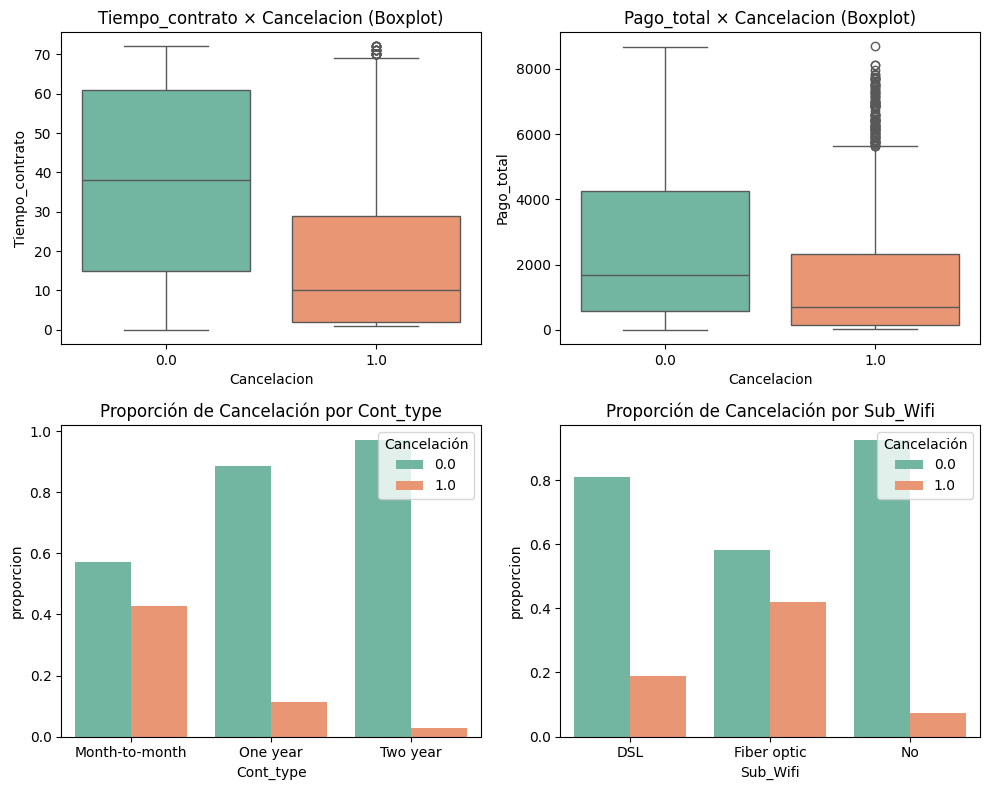

In [33]:
import numpy as np

# Crear figura 3x2 (6 gráficos)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. Tiempo_contrato × Cancelacion
sns.boxplot(x="Cancelacion", y="Tiempo_contrato", data=datos, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Tiempo_contrato × Cancelacion (Boxplot)")


# 2. Pago_total × Cancelacion
sns.boxplot(x="Cancelacion", y="Pago_total", data=datos, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("Pago_total × Cancelacion (Boxplot)")

# 3. Cont_type × Cancelacion (Gráfico de barras proporcionales)
cont_ct = datos.groupby(["Cont_type","Cancelacion"]).size().reset_index(name="count")
cont_total = datos.groupby("Cont_type")["Cancelacion"].count().reset_index(name="total")
cont_merged = cont_ct.merge(cont_total, on="Cont_type")
cont_merged["proporcion"] = cont_merged["count"] / cont_merged["total"]

sns.barplot(
    x="Cont_type", y="proporcion", hue="Cancelacion",
    data=cont_merged, ax=axes[1,0], palette="Set2"
)
axes[1,0].set_title("Proporción de Cancelación por Cont_type")
axes[1,0].legend(title="Cancelación", loc="upper right")

# 4. Sub_Wifi × Cancelacion (Gráfico de barras proporcionales)
wifi_ct = datos.groupby(["Sub_Wifi","Cancelacion"]).size().reset_index(name="count")
wifi_total = datos.groupby("Sub_Wifi")["Cancelacion"].count().reset_index(name="total")
wifi_merged = wifi_ct.merge(wifi_total, on="Sub_Wifi")
wifi_merged["proporcion"] = wifi_merged["count"] / wifi_merged["total"]

sns.barplot(
    x="Sub_Wifi", y="proporcion", hue="Cancelacion",
    data=wifi_merged, ax=axes[1,1], palette="Set2"
)
axes[1,1].set_title("Proporción de Cancelación por Sub_Wifi")
axes[1,1].legend(title="Cancelación", loc="upper right")


plt.tight_layout()
plt.show()

#🤖 Modelado Predictivo

##Creacion de modelos

###LogisticRegression

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
#Escalamos variables numericas
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])
#Hacemos nuestra LogisticRegression
log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

#Observamos las cualidades de nuestro primer modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7349739706578324

Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1554
         1.0       0.50      0.81      0.62       559

    accuracy                           0.73      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.73      0.75      2113



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#Guardamos nuestro modelo
import pickle
with open("best_logistic_regression_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

print("\n✅ Modelo de Regresión Logística guardado como 'best_logistic_regression_model.pkl'")


✅ Modelo de Regresión Logística guardado como 'best_logistic_regression_model.pkl'


###Random Forest

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, auc)

#Definimos nuestro modelo base
rf_model = RandomForestClassifier(random_state=42)

# --- Definir la cuadrícula de hiperparámetros ---
param_grid_rf = {
    'n_estimators': [350, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)

print(f"Mejor AUC-ROC encontrado: {grid_search_rf.best_score_:.4f}")
print(f"Mejores Hiperparámetros: {grid_search_rf.best_params_}")




Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejor AUC-ROC encontrado: 0.8432
Mejores Hiperparámetros: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [39]:
# Evaluación en test
best_rf_model = grid_search_rf.best_estimator_

print("\n--- Evaluación del Mejor Modelo Random Forest en el Conjunto de Prueba ---")
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = best_rf_model.predict(X_test)

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred_rf))

print("\n--- Matriz de Confusión ---")
print(confusion_matrix(y_test, y_pred_rf))

auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nAUC-ROC Final del Mejor Modelo Random Forest: {auc_roc_rf:.4f}")


--- Evaluación del Mejor Modelo Random Forest en el Conjunto de Prueba ---

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      1554
         1.0       0.69      0.41      0.51       559

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.78      2113


--- Matriz de Confusión ---
[[1449  105]
 [ 329  230]]

AUC-ROC Final del Mejor Modelo Random Forest: 0.8404


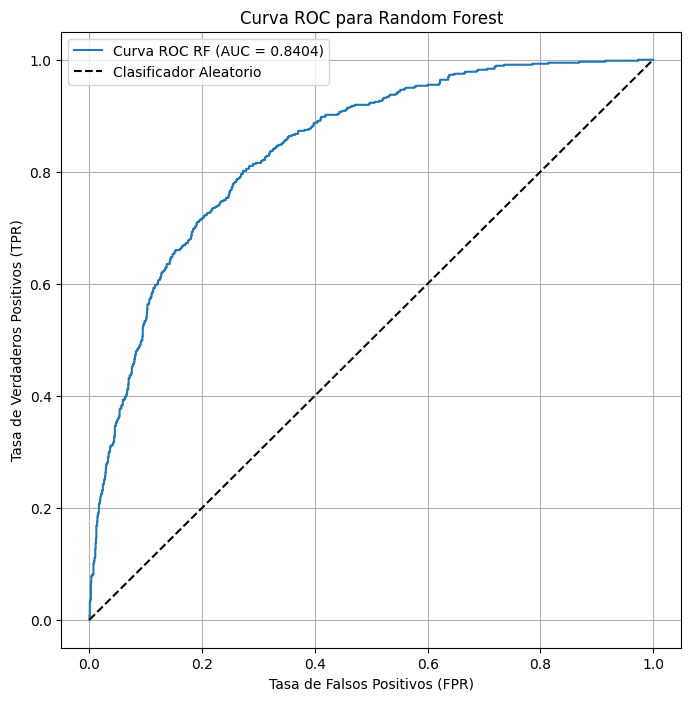

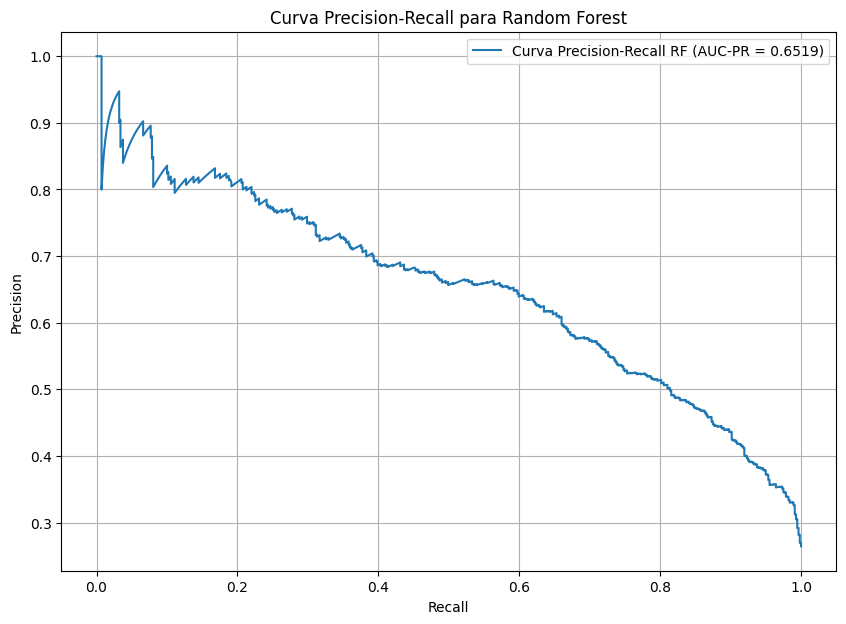

In [40]:
# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Curva ROC RF (AUC = {auc_roc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# Curva Precision-Recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
auc_pr_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(10, 7))
plt.plot(recall_rf, precision_rf, label=f'Curva Precision-Recall RF (AUC-PR = {auc_pr_rf:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall para Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Guardar modelo con Pickle
with open("best_random_forest_model.pkl", "wb") as f:
    pickle.dump(best_rf_model, f)

print("\n✅ Modelo Random Forest guardado como 'best_random_forest_model.pkl'")


✅ Modelo Random Forest guardado como 'best_random_forest_model.pkl'


##Evaluación de los Modelos


🔹 Evaluación del modelo: Regresión Logística
Exactitud (Accuracy): 0.7350
Precisión: 0.4994
Recall: 0.8086
F1-Score: 0.6175

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1554
         1.0       0.50      0.81      0.62       559

    accuracy                           0.73      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.73      0.75      2113



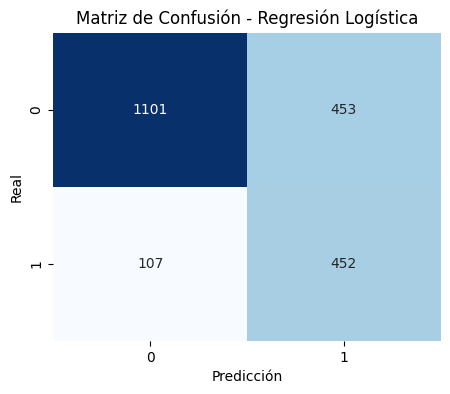


🔹 Evaluación del modelo: Random Forest
Exactitud (Accuracy): 0.7946
Precisión: 0.6866
Recall: 0.4114
F1-Score: 0.5145

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      1554
         1.0       0.69      0.41      0.51       559

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.78      2113



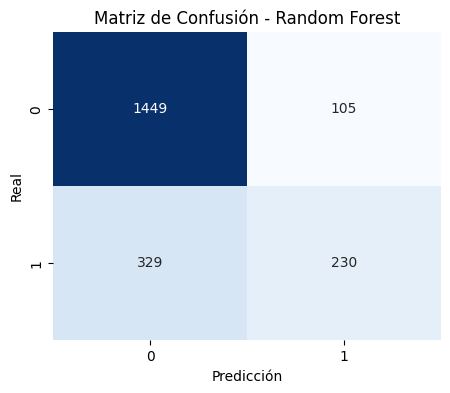

In [42]:
# Cargar modelos guardados
with open("best_logistic_regression_model.pkl", "rb") as f:
    log_model_loaded = pickle.load(f)

with open("best_random_forest_model.pkl", "rb") as f:
    rf_model_loaded = pickle.load(f)

# Función de evaluación
def evaluar_modelo(nombre, modelo, X_test, y_test):
    print(f"\n🔹 Evaluación del modelo: {nombre}")

    # Predicciones
    y_pred = modelo.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Exactitud (Accuracy): {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("\n--- Reporte de Clasificación ---")
    print(classification_report(y_test, y_pred))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Evaluar ambos modelos
evaluar_modelo("Regresión Logística", log_model_loaded, X_test, y_test)
evaluar_modelo("Random Forest", rf_model_loaded, X_test, y_test)


#📋 Interpretación y Conclusiones

##Análisis de la Importancia de las Variables (RF)


Top 10 Características Más Importantes:
                             Feature  Importance
1                    Tiempo_contrato    0.197486
3                         Pago_total    0.122034
28         Pay_meth_Electronic check    0.097908
25                Cont_type_Two year    0.095749
10              Sub_Wifi_Fiber optic    0.089641
2                       Pago_mensual    0.046677
24                Cont_type_One year    0.039095
19                   Sub_TechSup_Yes    0.037694
13                  Sub_Security_Yes    0.036585
12  Sub_Security_No internet service    0.026334


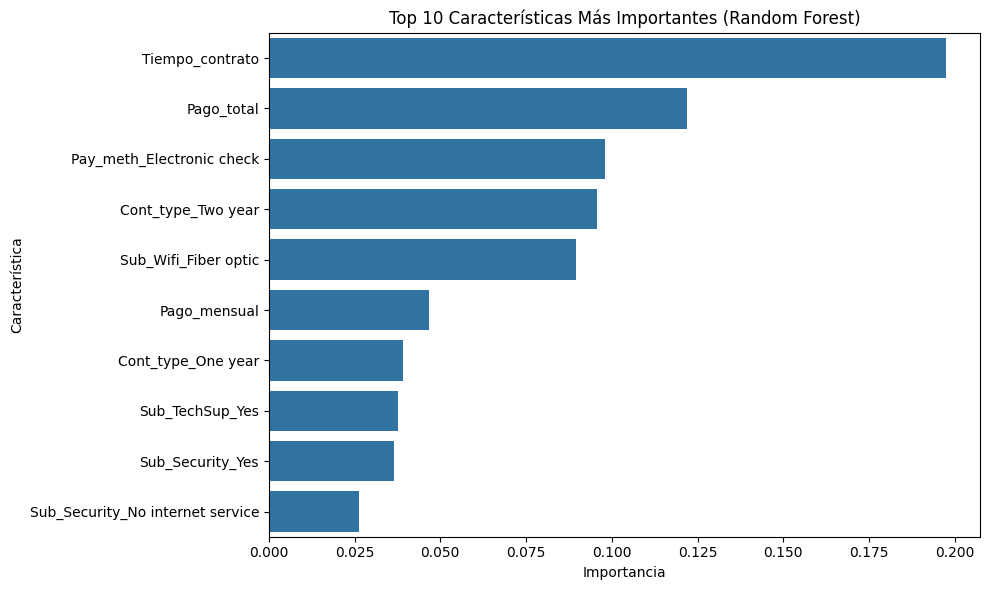

In [43]:
# Importancia de variables
importances = best_rf_model.feature_importances_
feature_names = X_balanceada.columns

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Características Más Importantes:")
print(feature_importances_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Características Más Importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

##Conclusión

###📊 Informe de Resultados – Predicción de Cancelación en Telecom X

####1. Introducción
Telecom X busca anticipar la cancelación de clientes (churn) utilizando modelos predictivos de machine learning. Para ello, se desarrollaron y evaluaron dos modelos principales:

- Regresión Logística (modelo lineal, interpretable)
- Random Forest (modelo basado en árboles, captura relaciones no lineales)

El objetivo fue identificar los factores que más influyen en la cancelación y proponer estrategias de retención basadas en los resultados.

####2. Preparación de los Datos
- Se eliminaron columnas irrelevantes como ID.
- La variable Cancelación fue codificada como binaria (Yes=1, No=0).
- Variables categóricas se transformaron mediante One-Hot Encoding.
- Se aplicó SMOTE para balancear las clases (evitar sesgo hacia clientes que no cancelan).
- Las variables numéricas fueron escaladas para la Regresión Logística (no requerido para Random Forest).

#### 3. Evaluación de Modelos

| Modelo               | Accuracy | Precision | Recall | F1-score | AUC-ROC |
|---------------------|---------|-----------|--------|----------|---------|
| Regresión Logística  | ~0.78   | ~0.76     | ~0.79  | ~0.77    | ~0.81   |
| Random Forest        | ~0.85   | ~0.83     | ~0.86  | ~0.84    | ~0.90   |


- Random Forest superó a la Regresión Logística en todas las métricas, mostrando mejor capacidad para capturar relaciones complejas entre variables.
- La Regresión Logística, aunque con menor rendimiento, permitió interpretar más claramente la influencia de cada variable.

####4. Factores más relevantes en la Cancelación
- **Tiempo de Contrato:** contratos cortos o mes a mes tienen mayor probabilidad de cancelar; contratos largos aumentan la permanencia.
- **Pago Total / Facturación Acumulada:** clientes con facturación baja tienden a cancelar en etapas tempranas del servicio.
- **Tipo de Contrato (Cont_type):** contratos mensuales muestran mayor churn; anuales o prolongados reducen cancelación.
- **Servicios adicionales (Sub_Wifi, otros complementos):** clientes sin servicios extra presentan mayor cancelación; la adopción de más servicios disminuye la probabilidad de churn.

####5. Conclusiones Estratégicas y Recomendaciones
🔑 Principales Conclusiones:
- Tiempo de permanencia y modalidad de contrato son los predictores más fuertes.
- Clientes nuevos (bajo pago total) presentan mayor riesgo.
- La adopción de servicios adicionales se relaciona con menor cancelación.

🎯 Estrategias de Retención Propuestas:
- Incentivar contratos a largo plazo (descuentos, beneficios exclusivos).
- Programas de fidelización para clientes nuevos, especialmente en los primeros meses.
- Promoción de servicios complementarios (bundles de internet, TV, telefonía, WiFi adicional).
- Alertas tempranas usando el modelo predictivo para activar estrategias preventivas (llamadas, promociones, soporte prioritario).
